In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load('data/np_data.npy')
data.shape

(15315, 3200)

In [3]:
num_shots = 3
receivers_per_line = 638 
num_lines = 8 

source_idx = np.array([(receivers_per_line *num_lines)*i + i for i in range(num_shots +1)])
source_idx = np.concatenate((np.array([-1]),source_idx))

# get time stamps 
def get_time(data,delta_t=2*1e-3):
    return np.arange(data.shape[1])*delta_t

def get_source_signal(shot_no,data=data):
    return data[source_idx[shot_no]]

# this returns the signals from given shot and line 
def get_receivers_data(shot_no,line_no,data=data):
    signal = data[source_idx[shot_no]+1:source_idx[shot_no +1]] # select the data from given shot
    line_signals = np.split(signal,num_lines,axis=0)            # split the array into num of lines 
    return np.array(line_signals[line_no-1])  

time = get_time(data)                    # time 
signals = get_receivers_data(1,1)        # signal (R)
source = get_source_signal(1)            # source 

In [4]:
# amplitude data by receiver line at each time step: shape(3600,amplitude)
signals = signals.T

In [5]:
def match_filter(signals, source):
    """
    Apply a matched filter to the input data using the given source.
    
        
    Returns:
    np.ndarray: Filtered data with the same shape as the input data
    """
    v = source[::-1]       # Reverse the source array
    N, M = signals.shape   # Get the dimensions of the data
    idx = np.argmax(v)     # Find the index of the maximum value in v (=sorce)
    
    # Initialize output array (has same shape as inpu data array)
    filtered_data = np.zeros_like(signals) 
    
    # go through each receiver's signal and apply the filter 
    for i in range(M):
        u = signals[:, i]                      # signal from ith receiver in the array 
        y = np.convolve(u, v, mode='full')  # convlve signal (u) with source(v)
        
        # Adjust the size and position of y
        y = y[idx:idx+N]
        
        # re-scale the filtered signal to have same amplitude as signal 
        M0 = np.max(np.abs(u))
        M1 = np.max(np.abs(y))
        y = y / M1 * M0         
        
        filtered_data[:, i] = y
    
    return filtered_data

In [6]:
# filtered data : shape(3200,638)
mf= match_filter(signals,source)

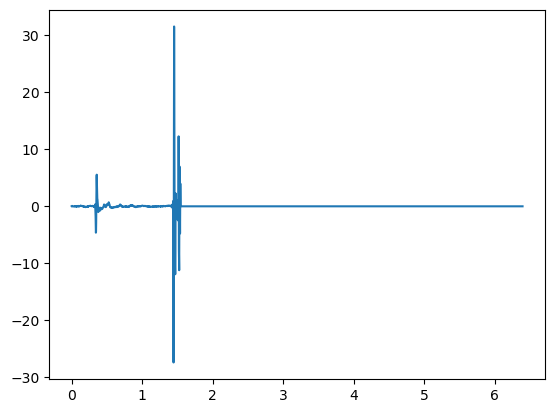

In [7]:
# filtered signal from 1st receiver (from line 1) 
plt.plot(time,signals[:,0])

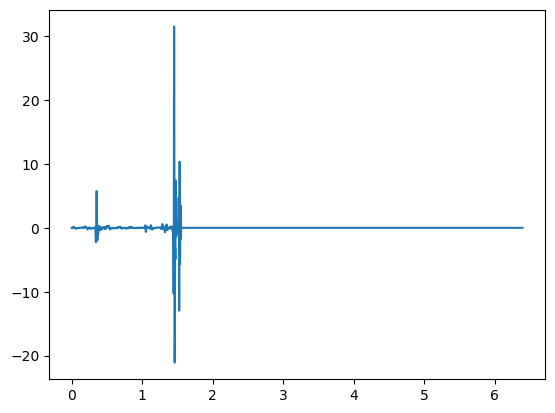

In [8]:
plt.plot(time,mf[:,0])

In [9]:
signals.shape

(3200, 638)

(6.398000000000001, 0.0)

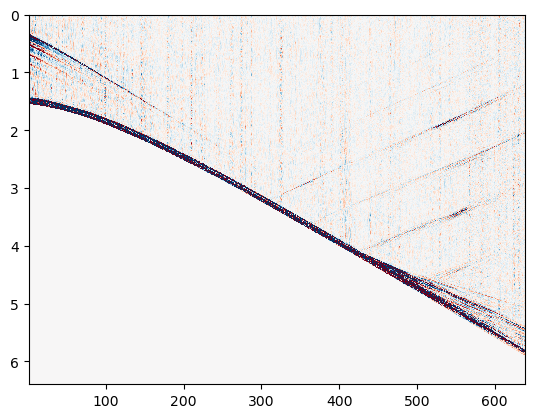

In [10]:
# the original (before filtering)
R = np.arange(1,receivers_per_line+1)
time.shape, signals.shape, R.shape
plt.pcolormesh(R,time,signals, shading='auto', cmap='RdBu_r')
plt.clim([-0.25, 0.25])
plt.ylim(time[-1],time[0]) 

(6.398000000000001, 0.0)

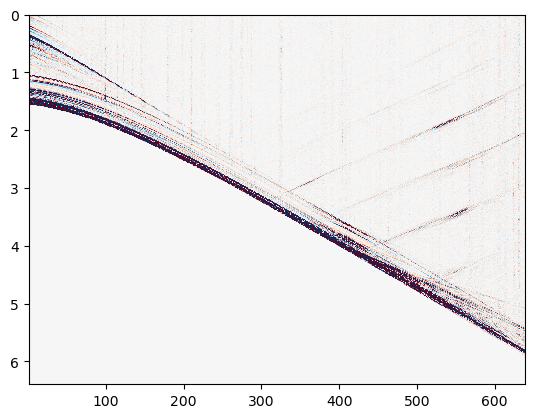

In [11]:
# signal after filtering 
plt.pcolormesh(R,time,mf, shading='auto', cmap='RdBu_r')
plt.clim([-0.25, 0.25])
plt.ylim(time[-1],time[0]) 